In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [34]:
# Load the results
auto_df = pd.read_csv("autosklearn_results.csv")
hyperopt_df = pd.read_csv("hyperopt_results.csv")
hyperopt_df.columns=["Dataset ID","Hyperopt R² Score","Hyperopt MSE","Hyperopt Time","Best Model"]

In [35]:

# Drop Dataset ID 195

auto_df = auto_df[auto_df["Dataset ID"] != 195]
hyperopt_df = hyperopt_df[hyperopt_df["Dataset ID"] != 195]
auto_df = auto_df[auto_df["Dataset ID"] != 204]
hyperopt_df = hyperopt_df[hyperopt_df["Dataset ID"] != 204]

# Merge datasets on 'Dataset ID'
merged_df = pd.merge(auto_df, hyperopt_df, on="Dataset ID", suffixes=("_AutoSklearn", "_Hyperopt"))

In [36]:
merged_df.to_csv("Good.csv")

In [38]:
hyperopt_r2_life=0.855861584157042
hyperopt_mse_life=13.4767715590262
hyperopt_time_life=285.789971113205
auto_sklearn_r2_life=0.8528
auto_sklearn_mse_life=13.76220
auto_sklearn_time_life=1801.03


In [39]:
# New row data
new_row = {
    "Dataset ID": "43505",
    "AutoSklearn R² Score": 0.8528,
    "AutoSklearn MSE": 13.76220,
    "AutoSklearn Time (s)": 1801.03,
    "Hyperopt R² Score": 0.855861584157042,
    "Hyperopt MSE": 13.4767715590262,
    "Hyperopt Time": 285.789971113205,
    "Best Model": "N/A",  # Adjust this if needed
}

# Convert the new row into a DataFrame and concatenate
results_df = pd.concat([merged_df, pd.DataFrame([new_row])], ignore_index=True)

# ✅ Display updated DataFrame


In [31]:
results_df

,Dataset ID,AutoSklearn R² Score,AutoSklearn MSE,AutoSklearn Time (s),Hyperopt R² Score,Hyperopt MSE,Hyperopt Time,Best Model
0,8,0.1295,7.8644,1801.75,0.175627,8.775217,33.515425,{'learner': AdaBoostRegressor(learning_rate=0....
1,531,0.8573,10.8029,1801.97,0.867279,9.732928,76.586036,"{'learner': XGBRegressor(base_score=0.5, boost..."
2,204,0.0336,3452.4542,1803.62,-0.064799,2674.632253,30.684822,{'learner': ExtraTreeRegressor(criterion='frie...
3,43505,0.8528,13.7622,1801.03,0.855862,13.476772,285.789971,N/A


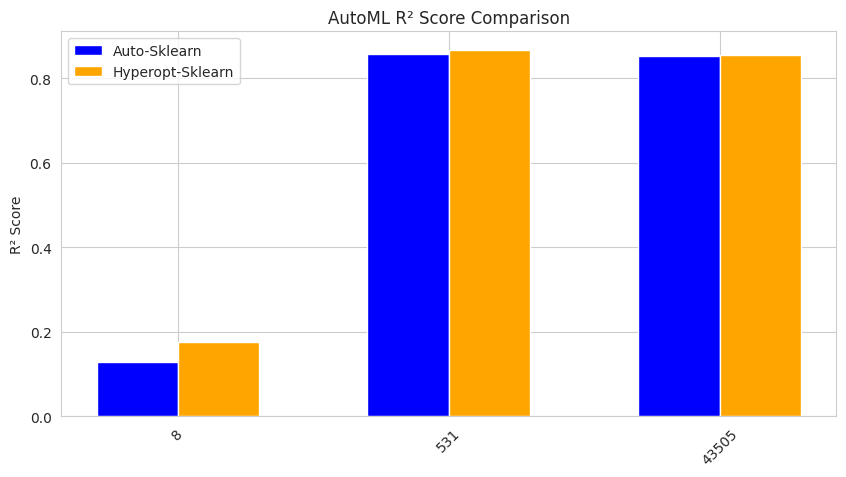

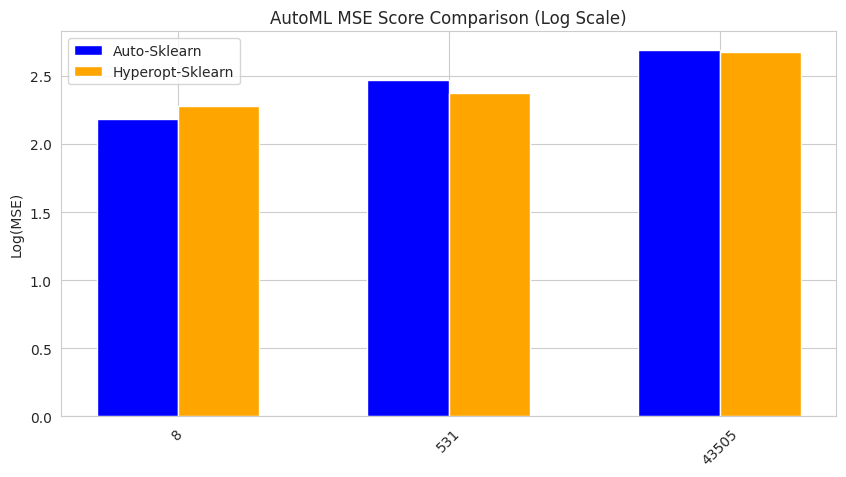

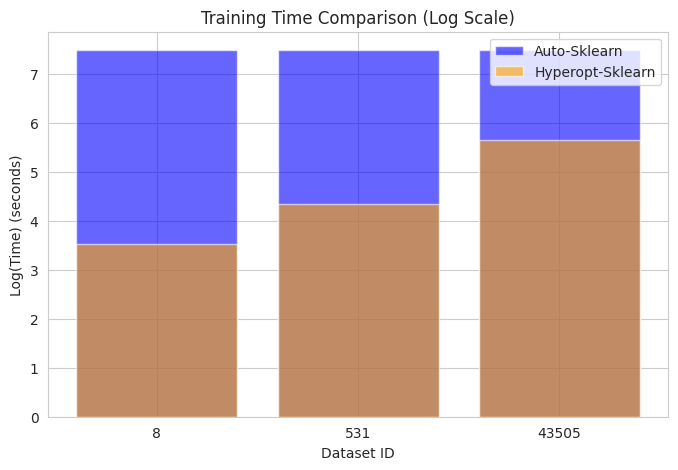

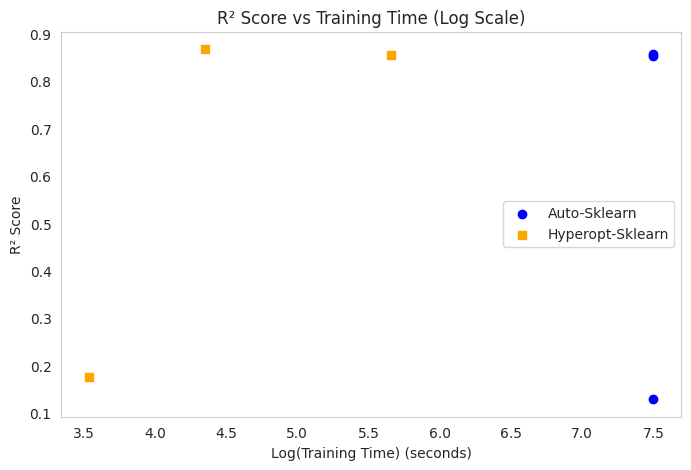

In [40]:


# # Drop Dataset ID 195
# auto_df = auto_df[auto_df["Dataset ID"] != 195]
# hyperopt_df = hyperopt_df[hyperopt_df["Dataset ID"] != 195]

# # Merge datasets on 'Dataset ID'
# merged_df = pd.merge(auto_df, hyperopt_df, on="Dataset ID", suffixes=("_AutoSklearn", "_Hyperopt"))
merged_df= results_df
# Extract values
datasets = merged_df["Dataset ID"].astype(str)
auto_sklearn_r2 = merged_df["AutoSklearn R² Score"]
hyperopt_r2 = merged_df["Hyperopt R² Score"]
auto_sklearn_mse = merged_df["AutoSklearn MSE"]
hyperopt_mse = merged_df["Hyperopt MSE"]
auto_sklearn_time = merged_df["AutoSklearn Time (s)"]
hyperopt_time = merged_df["Hyperopt Time"]

# ✅ Bar Plot: R² Score Comparison
plt.figure(figsize=(10, 5))
x = np.arange(len(datasets))
width = 0.3
plt.bar(x - width/2, auto_sklearn_r2, width, label='Auto-Sklearn', color='blue')
plt.bar(x + width/2, hyperopt_r2, width, label='Hyperopt-Sklearn', color='orange')
plt.xticks(x, datasets, rotation=45)
plt.ylabel("R² Score")
plt.title("AutoML R² Score Comparison")
plt.legend()
plt.show()

# ✅ Bar Plot: MSE Comparison (Using Log Scale)
plt.figure(figsize=(10, 5))
plt.bar(x - width/2, np.log1p(auto_sklearn_mse), width, label='Auto-Sklearn', color='blue')
plt.bar(x + width/2, np.log1p(hyperopt_mse), width, label='Hyperopt-Sklearn', color='orange')
plt.xticks(x, datasets, rotation=45)
plt.ylabel("Log(MSE)")
plt.title("AutoML MSE Score Comparison (Log Scale)")
plt.legend()
plt.show()

# ✅ Bar Plot: Time Comparison (Using Log Scale)
plt.figure(figsize=(8, 5))
plt.bar(datasets, np.log1p(auto_sklearn_time), color='blue', alpha=0.6, label='Auto-Sklearn')
plt.bar(datasets, np.log1p(hyperopt_time), color='orange', alpha=0.6, label='Hyperopt-Sklearn')
plt.xlabel("Dataset ID")
plt.ylabel("Log(Time) (seconds)")
plt.title("Training Time Comparison (Log Scale)")
plt.legend()
plt.show()

# ✅ Scatter Plot: R² Score vs Training Time (Log Scale)
plt.figure(figsize=(8, 5))
plt.scatter(np.log1p(auto_sklearn_time), auto_sklearn_r2, label='Auto-Sklearn', color='blue', marker='o')
plt.scatter(np.log1p(hyperopt_time), hyperopt_r2, label='Hyperopt-Sklearn', color='orange', marker='s')
plt.xlabel("Log(Training Time) (seconds)")
plt.ylabel("R² Score")
plt.title("R² Score vs Training Time (Log Scale)")
plt.legend()
plt.grid()
plt.show()


In [41]:
results_df

,Dataset ID,AutoSklearn R² Score,AutoSklearn MSE,AutoSklearn Time (s),Hyperopt R² Score,Hyperopt MSE,Hyperopt Time,Best Model
0,8,0.1295,7.8644,1801.75,0.175627,8.775217,33.515425,{'learner': AdaBoostRegressor(learning_rate=0....
1,531,0.8573,10.8029,1801.97,0.867279,9.732928,76.586036,"{'learner': XGBRegressor(base_score=0.5, boost..."
2,43505,0.8528,13.7622,1801.03,0.855862,13.476772,285.789971,N/A
